In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten
from keras import Input
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras import layers

In [46]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [47]:
print('X_train shape::: ',X_train.shape)
print('X_test shape::: ',X_test.shape)
print('y_train shape::: ',y_train.shape)
print('y_test shape::: ',y_test.shape)

X_train shape:::  (50000, 32, 32, 3)
X_test shape:::  (10000, 32, 32, 3)
y_train shape:::  (50000, 1)
y_test shape:::  (10000, 1)


In [48]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [49]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [50]:
y_test2 = y_test

In [51]:
def disp_img(X,y):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
    fig,ax = plt.subplots(5,5,sharey=False, tight_layout=True, figsize=(17,17), facecolor='white')
    n=0
    for i in range(0,5):
        for j in range(0,5):
            ax[i,j].matshow(X[n+15])
            index = int(y[n+15])
            ax[i,j].set_title(labels[index],fontsize=8)
            n=n+1
    plt.show()

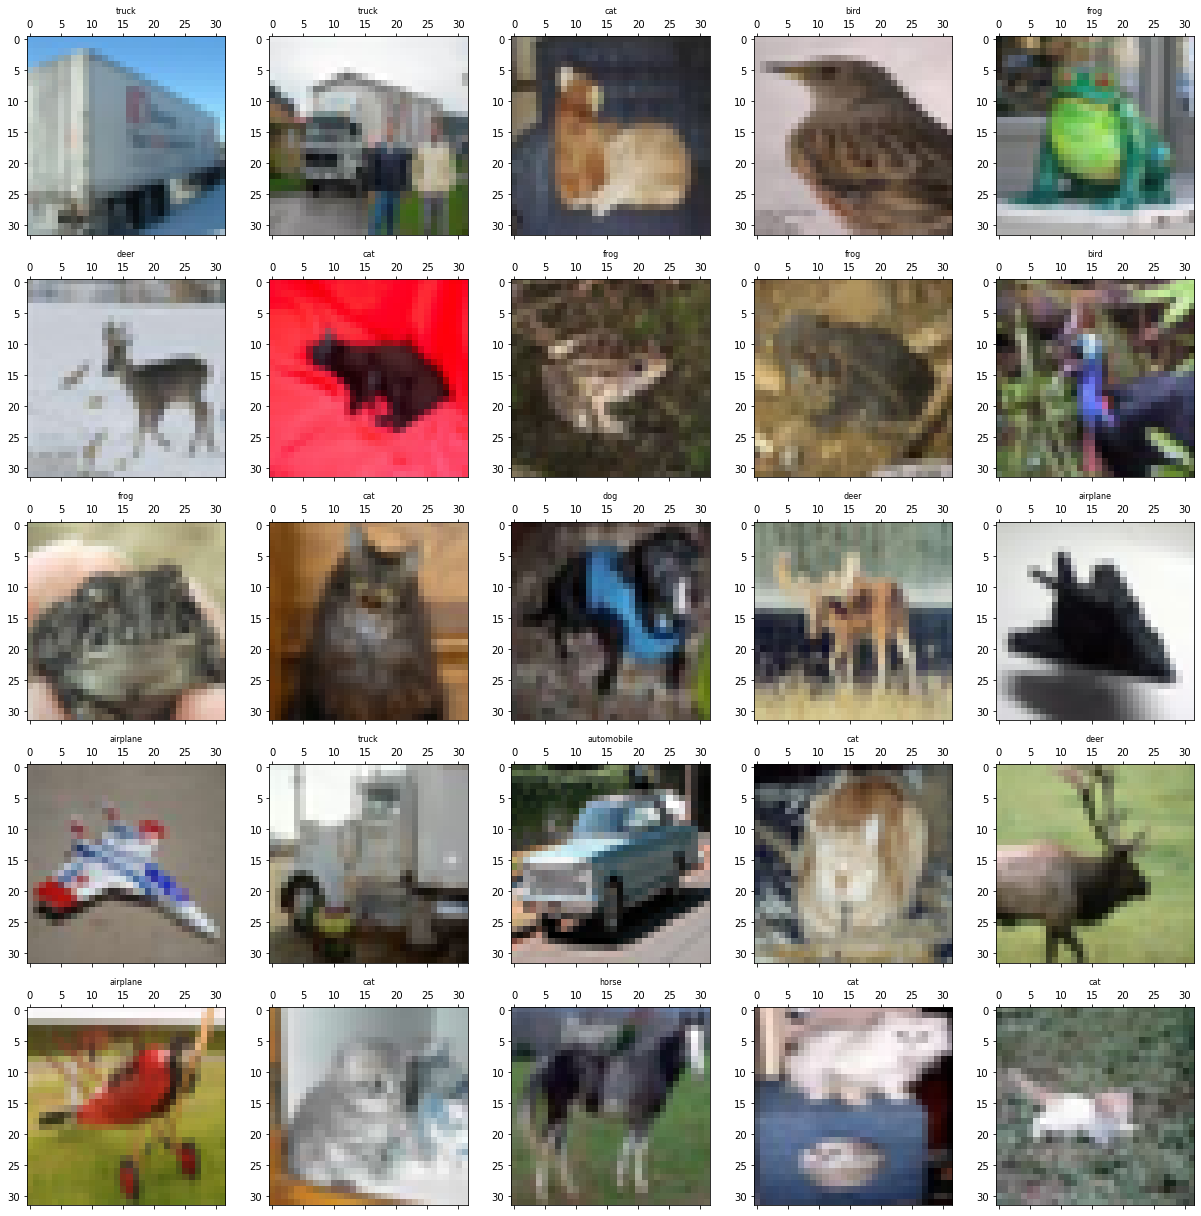

In [52]:
disp_img(X_train,y_train)

In [53]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [54]:
y_train.shape

(50000, 10)

In [55]:
def plot_acc(model_run):
    plt.figure(figsize=(15,8))
    epochs = range(1,11)
    train_accuracy = model_run.history['accuracy']
    val_accuracy = model_run.history['val_accuracy']
    sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
    plt.title('Accuracy v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

In [56]:
def plot_loss(model_run):
    plt.figure(figsize=(15,8))
    epochs = range(1,11)
    train_loss = model_run.history['loss']
    val_loss = model_run.history['val_loss']
    sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
    plt.title('Loss v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

In [57]:
def evaluation(model):
    loss,accuracy = model.evaluate(X_test,y_test)
    print('loss = ',np.round(loss,5))
    print('accuracy = ',np.round(accuracy*100,2))
    
    y_pred = np.argmax(model.predict(X_test),axis=1)
    print(classification_report(y_test2,y_pred))

In [58]:
def predict_image(model,index):
    y_pred = np.argmax(model.predict(X_test),axis=1)
    
    plt.matshow(X_test[index])
    y_ind = int(y_test2[index])
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    plt.title(labels[y_ind])
    
    y_ind2 = int(y_pred[index])
    print('predicted item name ::: ',labels[y_ind2])

## Rescaling and Resizing

* Rescaling RGB values by dividing all values by 255
* Resizing values from 32x32x3 to 128x128x3

In [59]:
img_size = 128
re_scale_size = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size,img_size,input_shape=[32,32,3]),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./225)    ])

In [60]:
img = next(iter(X_train))

In [61]:
img.shape

(32, 32, 3)

* Sequential Works only with 4 dimensions but we have only 3 dimensions
* Hence we expand the dimensions
* The 4th dimension added is the number of images or batch_size

In [62]:
img_new = tf.expand_dims(img,0)

In [63]:
img_new.shape

TensorShape([1, 32, 32, 3])

In [64]:
result = re_scale_size(img_new)

In [65]:
result.shape

TensorShape([1, 128, 128, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape before resizing :::  32 x 32 
shape after resizing :::  128 x 128 


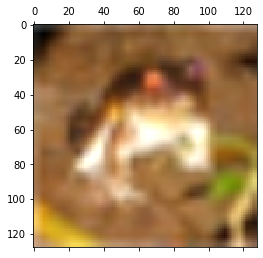

In [66]:
plt.matshow(result[0])
print('shape before resizing :::  {0} x {1} '.format(img.shape[0],img.shape[1]))
print('shape after resizing :::  {0} x {1} '.format(result[0].shape[0],result[0].shape[1]))

## Rotating and Flipping
* flipping both horizontally and vertically
* rotating image -20 degrees to 30 degrees clockwise

In [67]:
data_augmentation = tf.keras.Sequential([
                            tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
])

In [68]:
img = X_train[9]/255.0

In [69]:
img.shape

(32, 32, 3)

In [70]:
img_new = tf.expand_dims(img,0)

In [71]:
result = data_augmentation(img_new)

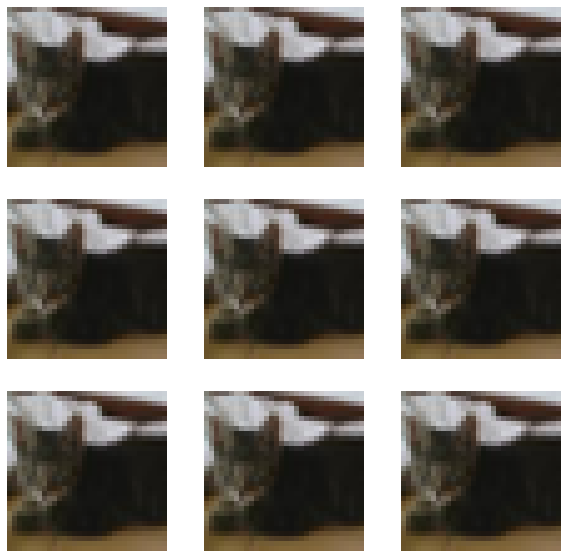

In [72]:
plt.figure(figsize=(10,10))
for i in range(9):
    augment_img = data_augmentation(img_new)
    ax = plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(augment_img[0])

# NON AUGMENTED MODEL

In [73]:
def unaug_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [74]:
model_unaug = unaug_model()
history_unaug = model_unaug.fit(X_train,y_train,epochs=10,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/10
1250/1250 [==============================] - 60s 47ms/step - loss: 1.4351 - accuracy: 0.4891 - val_loss: 1.5923 - val_accuracy: 0.4789
Epoch 2/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.1402 - accuracy: 0.5982 - val_loss: 1.2236 - val_accuracy: 0.5938
Epoch 3/10
1250/1250 [==============================] - 59s 48ms/step - loss: 0.9330 - accuracy: 0.6741 - val_loss: 1.0245 - val_accuracy: 0.6502
Epoch 4/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.8295 - accuracy: 0.7110 - val_loss: 0.9925 - val_accuracy: 0.6618
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.7582 - accuracy: 0.7362 - val_loss: 0.9089 - val_accuracy: 0.7043
Epoch 6/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.6791 - accuracy: 0.7630 - val_loss: 0.9328 - val_accuracy: 0.6913
Epoch 7/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.6586 - accuracy: 0.7719 - val_loss: 0.8353 -

In [75]:
model_unaug.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)      

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


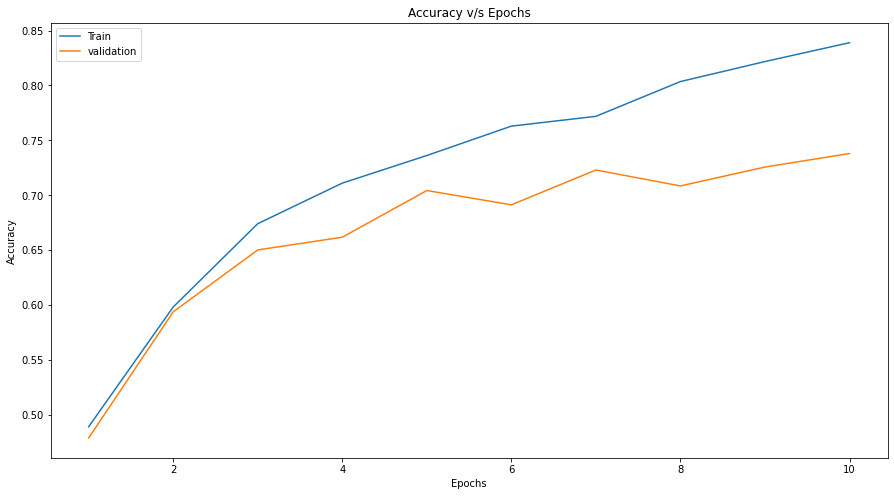

In [76]:
plot_acc(history_unaug)

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


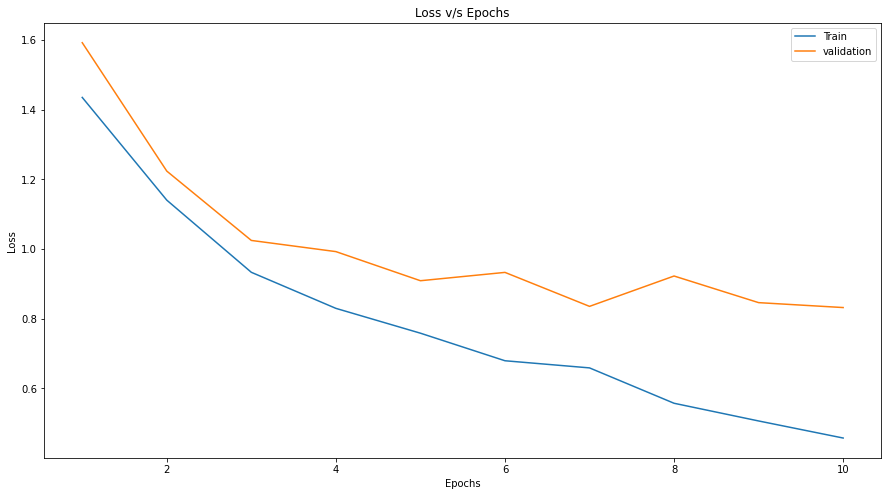

In [77]:
plot_loss(history_unaug)

In [78]:
evaluation(model_unaug)

313/313 [==============================] - 4s 14ms/step - loss: 0.8331 - accuracy: 0.7349
loss =  0.83305
accuracy =  73.49
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1000
           1       0.81      0.89      0.85      1000
           2       0.63      0.64      0.63      1000
           3       0.56      0.59      0.57      1000
           4       0.69      0.73      0.71      1000
           5       0.71      0.55      0.61      1000
           6       0.73      0.84      0.78      1000
           7       0.77      0.79      0.78      1000
           8       0.83      0.85      0.84      1000
           9       0.81      0.80      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



predicted item name :::  frog


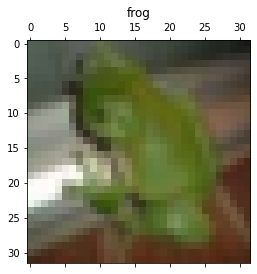

In [79]:
predict_image(model_unaug,7)

# AUGMENTED MODEL

In [80]:
def aug_model():
    model = Sequential()
    model.add(re_scale_size)
    model.add(data_augmentation)
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
    return model

In [81]:
model_aug = aug_model()
history_aug = model_aug.fit(X_train,y_train,epochs=10,batch_size=128,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/10
313/313 [==============================] - 750s 2s/step - loss: 1.6052 - accuracy: 0.4206 - val_loss: 1.7658 - val_accuracy: 0.3874
Epoch 2/10
313/313 [==============================] - 738s 2s/step - loss: 1.2658 - accuracy: 0.5478 - val_loss: 1.5926 - val_accuracy: 0.4466
Epoch 3/10
313/313 [==============================] - 739s 2s/step - loss: 1.1286 - accuracy: 0.5972 - val_loss: 1.3100 - val_accuracy: 0.5521
Epoch 4/10
313/313 [==============================] - 740s 2s/step - loss: 1.0408 - accuracy: 0.6339 - val_loss: 1.1435 - val_accuracy: 0.5882
Epoch 5/10
313/313 [==============================] - 749s 2s/step - loss: 0.9771 - accuracy: 0.6549 - val_loss: 1.1174 - val_accuracy: 0.6141
Epoch 6/10
313/313 [==============================] - 898s 3s/step - loss: 0.9190 - accuracy: 0.6743 - val_loss: 0.9795 - val_accuracy: 0.6552
Epoch 7/10
313/313 [==============================] - 756s 2s/step - loss: 0.8631 - accuracy: 0.6970 - val_loss: 1.0914 - val_accuracy: 0.6237

In [83]:
model_aug.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 sequential_9 (Sequential)   (None, None, None, 3)     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


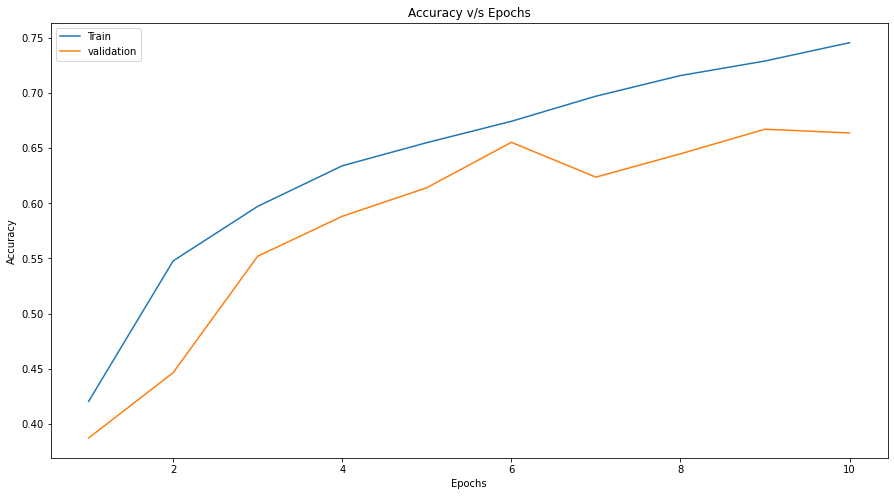

In [84]:
plot_acc(history_aug)

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


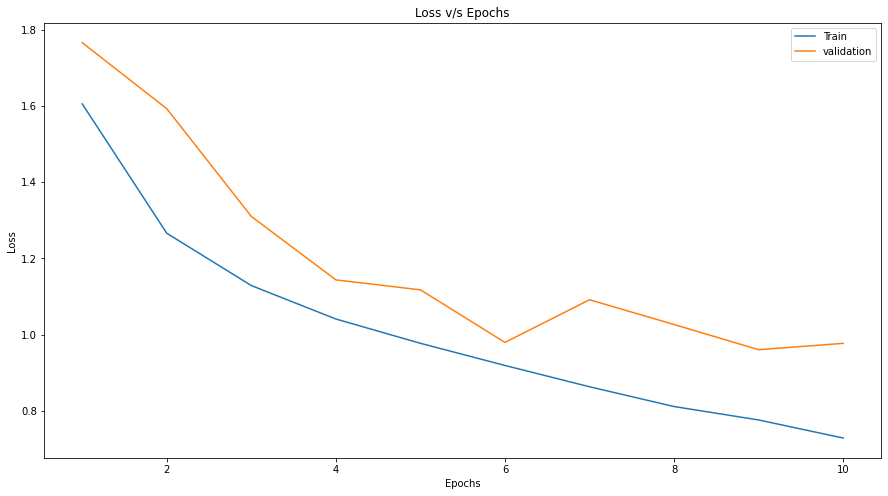

In [85]:
plot_loss(history_aug)

In [86]:
evaluation(model_aug)

313/313 [==============================] - 43s 139ms/step - loss: 0.9865 - accuracy: 0.6550
loss =  0.9865
accuracy =  65.5
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      1000
           1       0.81      0.75      0.78      1000
           2       0.46      0.65      0.54      1000
           3       0.50      0.43      0.46      1000
           4       0.57      0.67      0.62      1000
           5       0.70      0.46      0.56      1000
           6       0.81      0.66      0.73      1000
           7       0.73      0.69      0.71      1000
           8       0.69      0.82      0.75      1000
           9       0.67      0.86      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000



predicted item name :::  frog


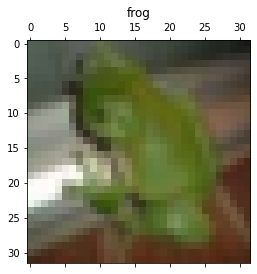

In [87]:
predict_image(model_aug,7)